In [1]:
import nltk
print(nltk.data.path)

['/root/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [2]:
import pandas as pd

df=pd.read_csv('/kaggle/input/olist-ecommerce/bdm-dataset2.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32995 entries, 0 to 32994
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       32995 non-null  object 
 1   customer_id                    32995 non-null  object 
 2   order_purchase_timestamp       32995 non-null  object 
 3   order_status                   32995 non-null  object 
 4   customer_city                  32995 non-null  object 
 5   customer_state                 32995 non-null  object 
 6   product_id                     32995 non-null  object 
 7   seller_id                      32995 non-null  object 
 8   price                          32995 non-null  float64
 9   freight_value                  32995 non-null  float64
 10  review_score                   23435 non-null  float64
 11  review_comment_title           9090 non-null   object 
 12  review_comment_message         9589 non-null  

In [3]:
df.describe()

,price,freight_value,review_score,product_weight_g
count,32995.000000,32995.000000,23435.000000,32995.000000
mean,123.072503,21.061500,3.409473,1925.218154
std,194.338391,18.291288,1.301759,3454.403550
min,0.850000,0.000000,1.000000,0.000000
25%,39.990000,12.790000,2.000000,264.000000
50%,77.900000,18.200000,3.000000,600.000000
75%,134.990000,22.980000,5.000000,1683.000000
max,6729.000000,375.280000,5.000000,30000.000000


## Paetro Principal analysis

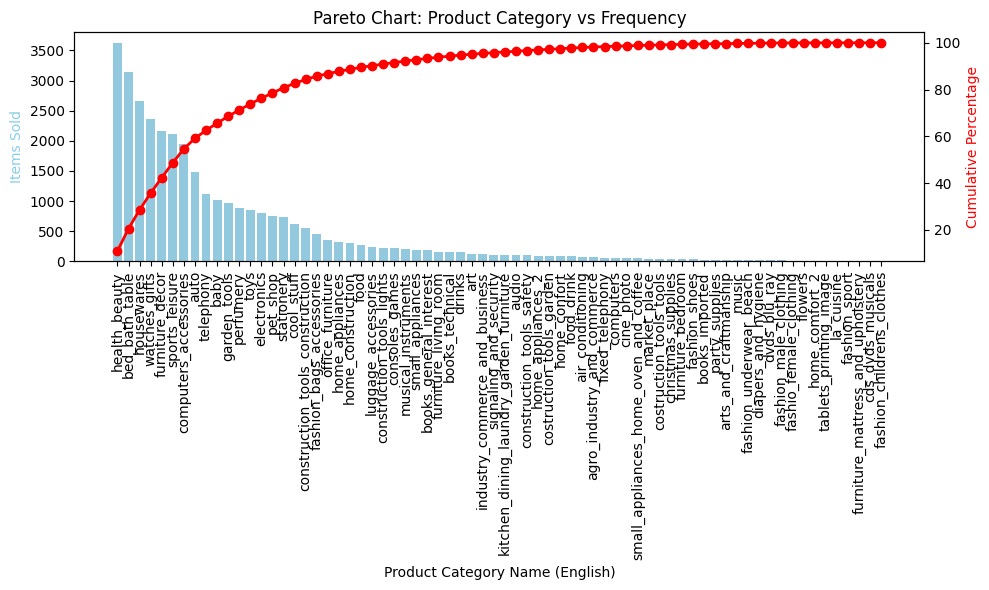

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is the DataFrame containing the data

# Step 1: Get the frequency of each product category
category_counts = df['product_category_name_english'].value_counts()

# Step 2: Sort the counts in descending order
category_counts = category_counts.sort_values(ascending=False)

# Step 3: Calculate the cumulative percentage
category_counts_cumsum = category_counts.cumsum() / category_counts.sum() * 100

# Step 4: Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for the frequency count
sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax1, color='skyblue')
ax1.set_xlabel('Product Category Name (English)')
ax1.set_ylabel('Items Sold', color='skyblue')
ax1.set_xticklabels(category_counts.index, rotation=90)

# Create a second y-axis for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(category_counts.index, category_counts_cumsum, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Percentage', color='red')

# Title and layout adjustments
plt.title('Pareto Chart: Product Category vs Frequency')
plt.tight_layout()

# Show the plot
plt.show()


### Insights from chart
- Data follows the patro principal as 80% of sales are coming from 20% of the products
- Top 5 SKU's Categories are;-
  - health beauty
  - bed bath tables
  - housewares
  - watches gifts
  - sports leisure

## Sales across various cities

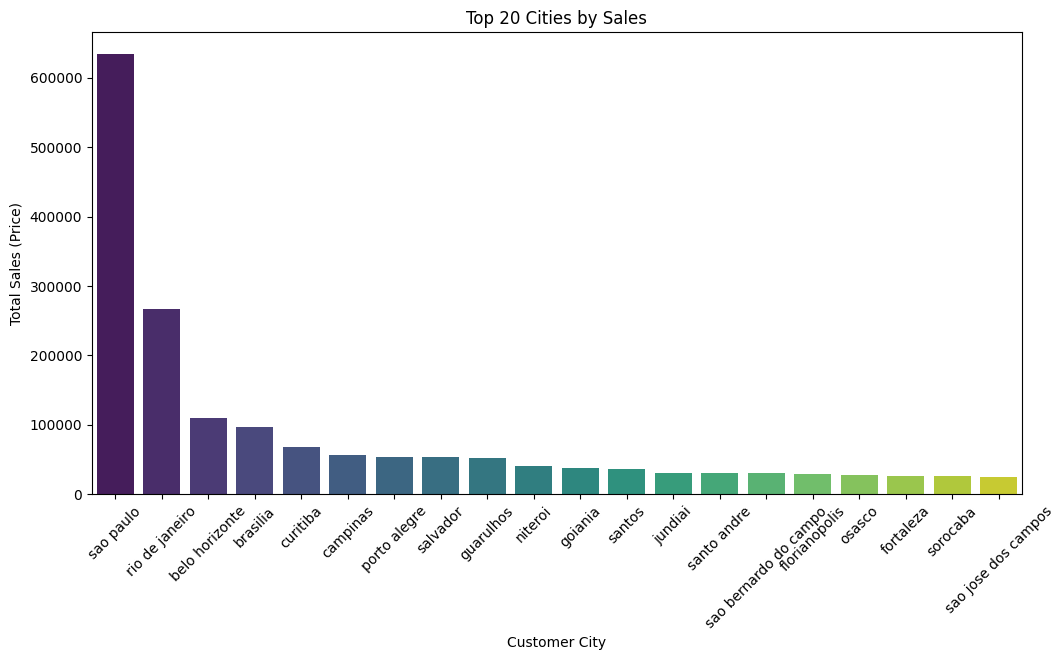

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# Assuming the data is in a DataFrame called `df`

# Convert the `order_purchase_timestamp` to datetime if necessary
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Group by customer city and sum the sales
city_sales = df.groupby('customer_city')['price'].sum().reset_index()
city_sales = city_sales.sort_values(by='price', ascending=False)

# Plot the top 10 cities with the highest sales for a cleaner graph
top_cities = city_sales.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='customer_city', y='price', palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 20 Cities by Sales')
plt.xlabel('Customer City')
plt.ylabel('Total Sales (Price)')
plt.show()


## Insights from the over garph
- Market Dominance: Sao Paulo and Rio de Janeiro are the top-performing cities, significantly outpacing the rest.
- Sales Concentration: A significant portion of sales is concentrated in these two cities.
- Regional Clusters: A group of cities (Belo Horizonte, Curitiba, Campinas, Porto Alegre) exhibit similar sales levels, suggesting potential regional trends.

## Analyzing the sellers availabilty acrooss various states

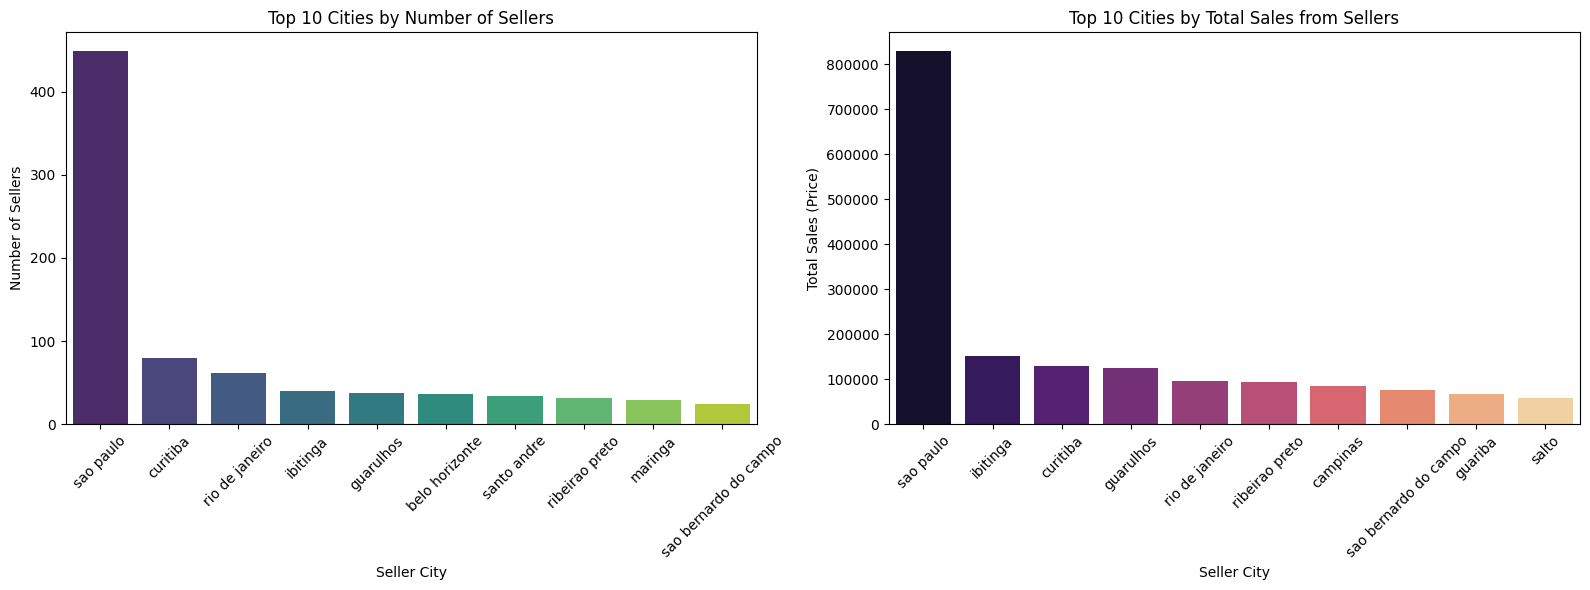

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# Assuming the data is in a DataFrame called `df`

# Convert `order_purchase_timestamp` to datetime if necessary
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# 1. Analysis: Number of Sellers per City
sellers_per_city = df.groupby('seller_city')['seller_id'].nunique().reset_index()
sellers_per_city = sellers_per_city.sort_values(by='seller_id', ascending=False)

# 2. Analysis: Total Sales per City by Sellers
sales_per_city = df.groupby('seller_city')['price'].sum().reset_index()
sales_per_city = sales_per_city.sort_values(by='price', ascending=False)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Top 10 cities by number of sellers
top_seller_cities = sellers_per_city.head(10)
sns.barplot(data=top_seller_cities, x='seller_city', y='seller_id', palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 Cities by Number of Sellers')
axes[0].set_xlabel('Seller City')
axes[0].set_ylabel('Number of Sellers')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Top 10 cities by total sales from sellers
top_sales_cities = sales_per_city.head(10)
sns.barplot(data=top_sales_cities, x='seller_city', y='price', palette='magma', ax=axes[1])
axes[1].set_title('Top 10 Cities by Total Sales from Sellers')
axes[1].set_xlabel('Seller City')
axes[1].set_ylabel('Total Sales (Price)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Insights
- Sao Paulo dominates both seller count and sales: Sao Paulo has the highest number of sellers and generates the most sales, indicating its strong market presence and influence.
- Disparity between seller count and sales: While some cities have a large number of sellers, their total sales are relatively low, suggesting potential opportunities for increasing sales per seller.

## Analyzing the Avg. review score across various product_categories

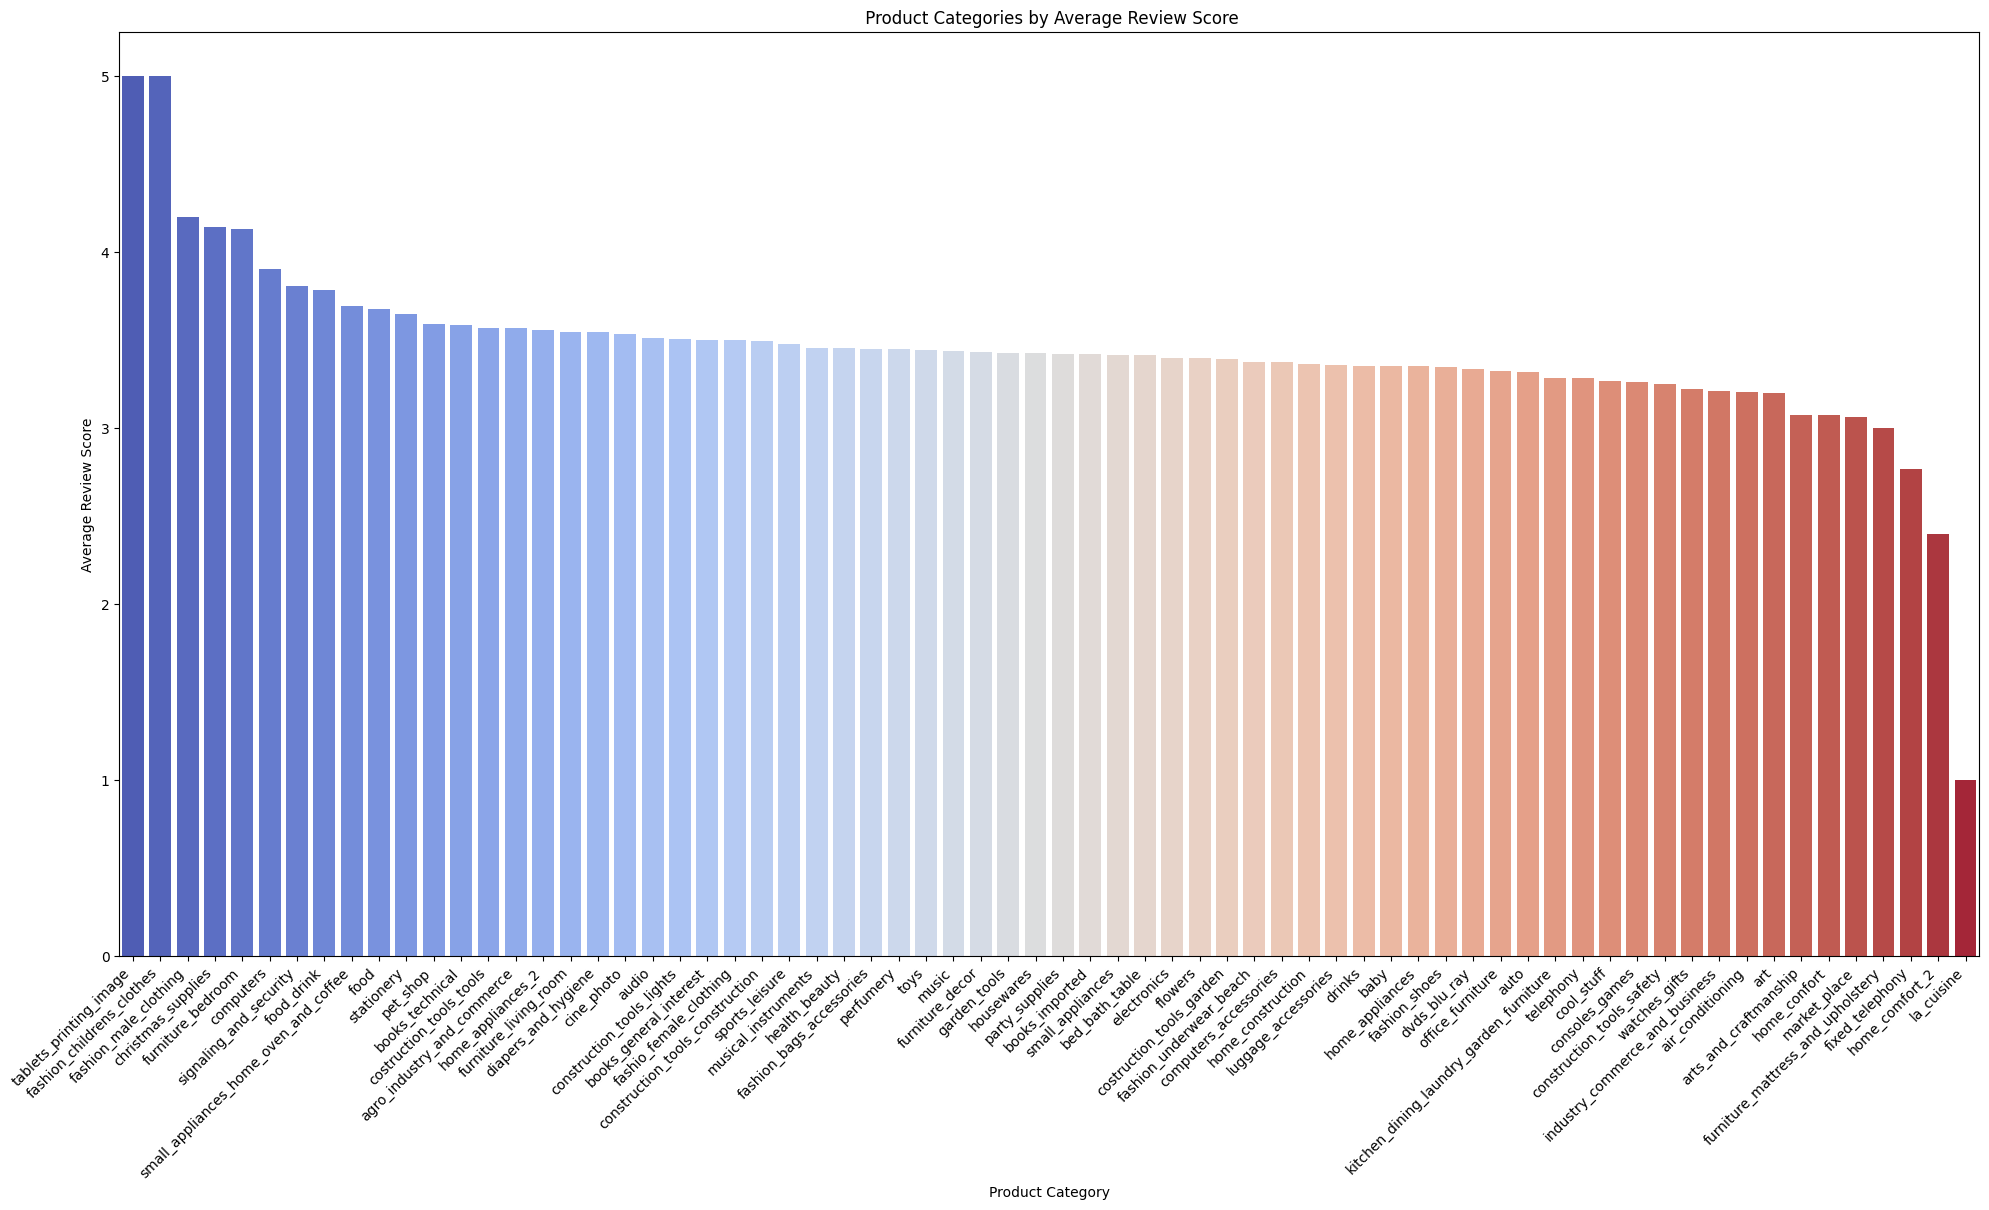

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# Assuming the data is in a DataFrame called `df`

# Drop rows where review_score is null, since we only want valid reviews
df_reviews = df.dropna(subset=['review_score'])

# Calculate the average review score per product category
average_review_score = df_reviews.groupby('product_category_name_english')['review_score'].mean().reset_index()
average_review_score = average_review_score.sort_values(by='review_score', ascending=False)

# Plotting the top 10 categories with the highest average review score
top_categories = average_review_score

plt.figure(figsize=(24, 12))
sns.barplot(data=top_categories, x='product_category_name_english', y='review_score', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title(' Product Categories by Average Review Score')
plt.xlabel('Product Category')
plt.ylabel('Average Review Score')
plt.show()

## Insights
- Almost 80% of categories have a avgerage review score between 4 to 5 which means the ecommerce business maintains proper quality of the items
- They can improve in poor performing categories like la_cousines and home_comfort_2

## Sales per month

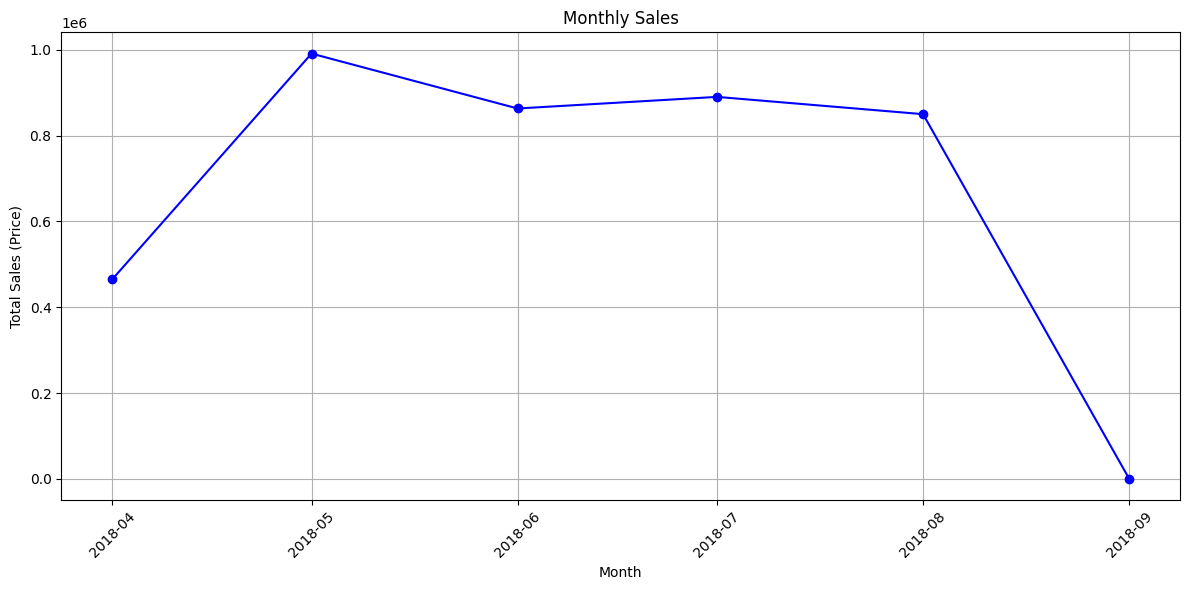

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
# Assuming the data is in a DataFrame called `df`

# Convert `order_purchase_timestamp` to datetime if not already in datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Extract month and year for each order
df['year_month'] = df['order_purchase_timestamp'].dt.to_period('M')

# Calculate monthly sales by grouping by `year_month` and summing `price`
monthly_sales = df.groupby('year_month')['price'].sum().reset_index()

# Convert `year_month` back to datetime for plotting
monthly_sales['year_month'] = monthly_sales['year_month'].dt.to_timestamp()

# Plotting monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['price'], marker='o', color='b')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales (Price)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Insights
- Sales seems to be okay

## Traffic Hours analysis

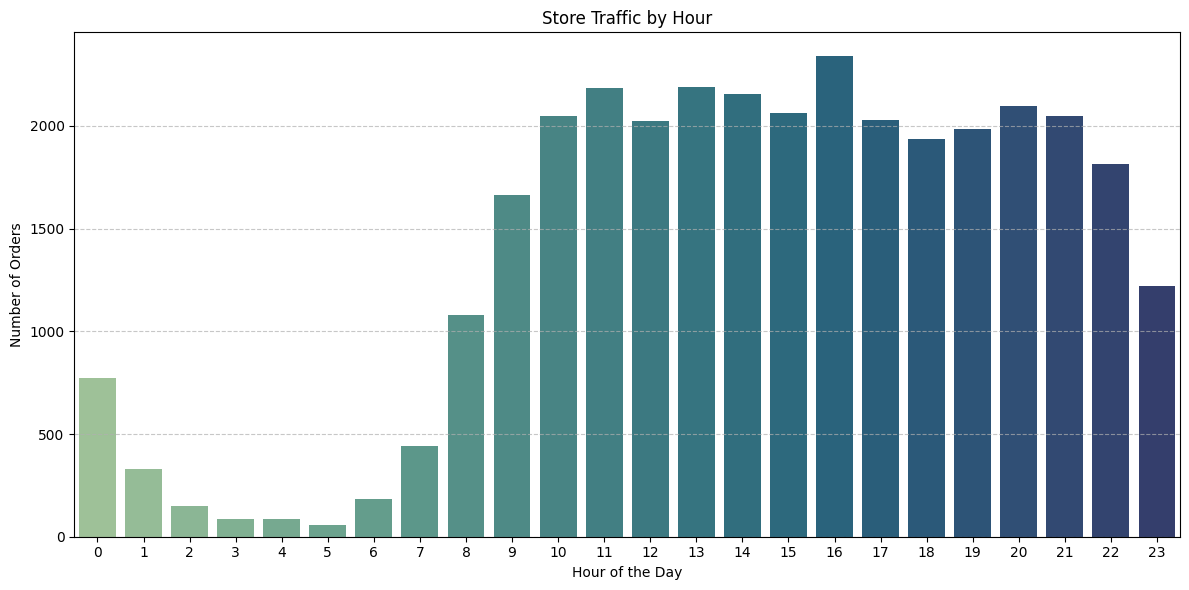

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# Assuming the data is in a DataFrame called `df`

# Convert `order_purchase_timestamp` to datetime if not already in datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Extract the hour from the purchase timestamp
df['order_hour'] = df['order_purchase_timestamp'].dt.hour

# Count orders per hour to find traffic peaks
hourly_traffic = df['order_hour'].value_counts().sort_index()

# Plotting hourly traffic
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_traffic.index, y=hourly_traffic.values, palette='crest')
plt.title('Store Traffic by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))  # Show each hour
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- Peak Hours: The store sees the highest foot traffic between 4 PM and 6 PM.
- Quiet Hours: Early mornings and late nights are the slowest periods for the store.
- Consistent Afternoon Traffic: The store experiences steady traffic between 1 PM and 3 PM.

## Unique Customers Every Month

[26025  2190   393   133    74    61     9     3     2     1]


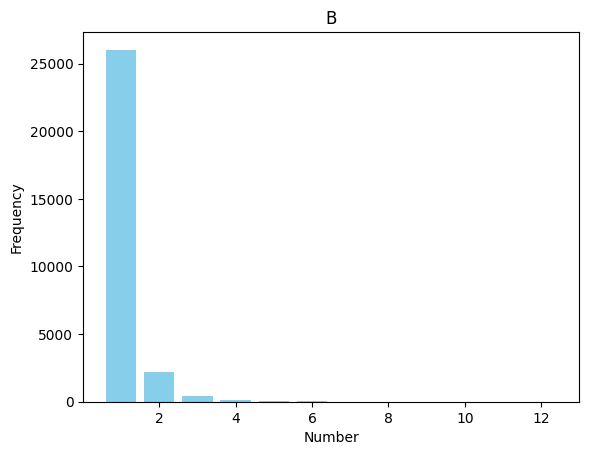

In [10]:
frequency=list(df['customer_id'].value_counts())
frequency=pd.Series(frequency).value_counts()
print(frequency.values)
plt.bar(frequency.index, frequency.values, color='skyblue')

# Add labels and title
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('B')

# Display the plot
plt.show()

## Customer Retention

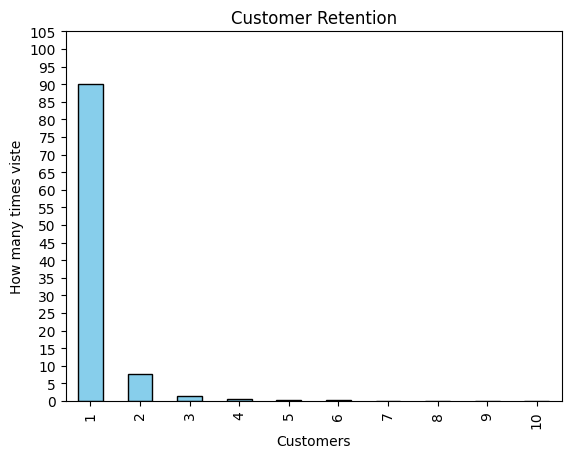

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Input array
arr = [26025, 2190, 393, 133, 74, 61, 9, 3, 2, 1]

# Calculate the sum of the array
sum_val = sum(arr)

# Create a dictionary to store percentages
obj = {}

# Calculate the percentage of each element
for index, element in enumerate(arr, start=1):
    obj[index] = (element / sum_val) * 100

# Convert the dictionary to a pandas Series
percentages = pd.Series(obj)

# Plot the bar chart
percentages.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the y-axis scale to be in multiples of 5
plt.yticks(range(0, 110, 5))

# Add labels and title
plt.xlabel('Customers')
plt.ylabel('How many times viste')
plt.title('Customer Retention')

# Display the plot
plt.show()

### Insights
- 90% of the customer only visited the store for one time
- 7.5% of the customer visited the store twice
- 1.6% of the customer visited the store only thrice

## Order status

In [12]:
df['order_status'].value_counts()

order_status
delivered     32514
shipped         261
canceled        137
invoiced         72
processing       11
Name: count, dtype: int64

To tackle customer retention and non-uniform sales distribution, I will first create
a unified dataset through SQL Joins and handle missing values with mean imputation.
For retention, I’ll perform **Sentiment Analysis on reviews**, correlate scores with order
status or review score, and use **Cohort Analysis and RFM Analysis to understand **
customer behaviors. For sales disparity, Ill conduct ** Freight Cost Analysis, AOV
Analysis **bold text** ** , and Geo-Spatial Analysis to identify regional inefficiencies and customer
spending patterns

### Customer Rentention
- Sentimental Analysis on reviews
- Cohort Analysis
- RFM Analysis


### Non Uniform Sales Distribution
- Freight Cost Analysis
- AOV Analysis


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32995 entries, 0 to 32994
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       32995 non-null  object        
 1   customer_id                    32995 non-null  object        
 2   order_purchase_timestamp       32995 non-null  datetime64[ns]
 3   order_status                   32995 non-null  object        
 4   customer_city                  32995 non-null  object        
 5   customer_state                 32995 non-null  object        
 6   product_id                     32995 non-null  object        
 7   seller_id                      32995 non-null  object        
 8   price                          32995 non-null  float64       
 9   freight_value                  32995 non-null  float64       
 10  review_score                   23435 non-null  float64       
 11  review_comment_

In [14]:
city_order_counts = df.groupby('customer_city')['order_id'].count().reset_index()
city_order_counts.rename(columns={'order_id': 'order_count'}, inplace=True)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate order counts per city
city_order_counts = df.groupby('customer_city')['order_id'].count().reset_index()
city_order_counts.rename(columns={'order_id': 'order_count'}, inplace=True)

# Calculate total orders
total_orders = city_order_counts['order_count'].sum()

# Calculate order percentage per city
city_order_counts['order_percentage'] = (city_order_counts['order_count'] / total_orders) * 100
city_order_counts.sort_values(by=['order_count'], ascending=False)
city_order_counts[city_order_counts['order_count'] == 1].shape[0]

# Sort by percentage for better visualization
#city_order_counts = city_order_counts.sort_values(by='order_percentage', ascending=False)

# Select top N cities for plotting (e.g., top 10)
# top_n = 10
# top_cities = city_order_counts.head(top_n)

# Plotting
# plt.figure(figsize=(12, 6))
# sns.barplot(x='customer_city', y='order_percentage', data=top_cities, palette='viridis')
# plt.title(f'Percentage of Orders from Top {top_n} Cities')
# plt.xlabel('Customer City')
# plt.ylabel('Order Percentage')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

974

## Order Count from top 20 percentage of cities

In [16]:



import pandas as pd
city_order_counts = city_order_counts.sort_values(by=['order_count'], ascending=False)
total_orders = city_order_counts['order_count'].sum()
top_20_percent_cities = city_order_counts.head(int(len(city_order_counts) * 0.2))
top_20_percent_orders = top_20_percent_cities['order_count'].sum()
percentage_from_top_20_percent = (top_20_percent_orders / total_orders) * 100

print(f"Percentage of orders from top 20% cities: {percentage_from_top_20_percent:.2f}%")

Percentage of orders from top 20% cities: 86.83%


In [17]:
# Calculate average freight value per city
average_freight_by_city = df.groupby('customer_city')['freight_value'].mean().reset_index()
average_freight_by_city = average_freight_by_city.rename(columns={'freight_value': 'average_freight'})

# Calculate order count per city
city_order_counts = df.groupby('customer_city')['order_id'].count().reset_index()
city_order_counts.rename(columns={'order_id': 'order_count'}, inplace=True)

# Merge the two DataFrames on 'customer_city'
average_freight_with_order_count = pd.merge(average_freight_by_city, city_order_counts, on='customer_city')

# ... (previous code to create average_freight_with_order_count) ...

# Sort by order_count in descending order
average_freight_with_order_count = average_freight_with_order_count.sort_values(by=['order_count'], ascending=False)

print(average_freight_with_order_count)

          customer_city  average_freight  order_count
2204          sao paulo        14.623086         5953
1926     rio de janeiro        22.312937         2084
279      belo horizonte        20.914775          932
343            brasilia        22.699551          757
708            curitiba        20.719181          525
...                 ...              ...          ...
1202      jardim alegre        23.470000            1
1200          jaraguari        19.410000            1
1195          japaraiba        23.560000            1
1189            jamaica        12.850000            1
1260  lagoa da confusao        37.060000            1

[2521 rows x 3 columns]


In [18]:
import pandas as pd

# Assuming 'df' is your DataFrame

# 1. Calculate order counts per city
city_order_counts = df.groupby('customer_city')['order_id'].count().reset_index()
city_order_counts.rename(columns={'order_id': 'order_count'}, inplace=True)

# 2. Sort cities by order count and get top 20%
city_order_counts = city_order_counts.sort_values(by=['order_count'], ascending=False)
top_20_percent_cities = city_order_counts.head(int(len(city_order_counts) * 0.2))

# 3. Get list of top 20% and rest 80% cities
top_20_cities_list = top_20_percent_cities['customer_city'].tolist()
rest_80_cities_list = city_order_counts[~city_order_counts['customer_city'].isin(top_20_cities_list)]['customer_city'].tolist()

# 4. Calculate average freight for top 20% cities
top_20_avg_freight = df[df['customer_city'].isin(top_20_cities_list)]['freight_value'].mean()

# 5. Calculate average freight for rest 80% cities
rest_80_avg_freight = df[df['customer_city'].isin(rest_80_cities_list)]['freight_value'].mean()

# 6. Print the results
print(f"Average freight cost for top 20% cities: {top_20_avg_freight:.2f}")
print(f"Average freight cost for rest 80% cities: {rest_80_avg_freight:.2f}")

Average freight cost for top 20% cities: 19.92
Average freight cost for rest 80% cities: 28.60


In [19]:
import pandas as pd

# Assuming 'df' is your DataFrame

# 1. Calculate order counts per city
city_order_counts = df.groupby('customer_city')['order_id'].count().reset_index()
city_order_counts.rename(columns={'order_id': 'order_count'}, inplace=True)

# 2. Sort cities by order count and get top 20%
city_order_counts = city_order_counts.sort_values(by=['order_count'], ascending=False)
top_20_percent_cities = city_order_counts.head(int(len(city_order_counts) * 0.2))

# 3. Get list of top 20% and rest 80% cities
top_20_cities_list = top_20_percent_cities['customer_city'].tolist()
rest_80_cities_list = city_order_counts[~city_order_counts['customer_city'].isin(top_20_cities_list)]['customer_city'].tolist()

# 4. Calculate total order value for top 20% cities
top_20_total_order_value = df[df['customer_city'].isin(top_20_cities_list)]['price'].sum()

# 5. Calculate total order value for rest 80% cities
rest_80_total_order_value = df[df['customer_city'].isin(rest_80_cities_list)]['price'].sum()

# 6. Calculate total number of orders for top 20% cities
top_20_total_orders = df[df['customer_city'].isin(top_20_cities_list)]['order_id'].nunique()

# 7. Calculate total number of orders for rest 80% cities
rest_80_total_orders = df[df['customer_city'].isin(rest_80_cities_list)]['order_id'].nunique()

# 8. Calculate AOV for top 20% cities
top_20_aov = top_20_total_order_value / top_20_total_orders

# 9. Calculate AOV for rest 80% cities
rest_80_aov = rest_80_total_order_value / rest_80_total_orders

# 10. Print the results
print(f"Average order value for top 20% cities: {top_20_aov:.2f}")
print(f"Average order value for rest 80% cities: {rest_80_aov:.2f}")

Average order value for top 20% cities: 139.22
Average order value for rest 80% cities: 148.98


In [20]:
import pandas as pd

# Assuming 'df' is your DataFrame with customer purchase data
frequency = list(df['customer_id'].value_counts())
frequency_counts = pd.Series(frequency).value_counts()

# Create a DataFrame for the table
visits_count_df = pd.DataFrame({
    'No. of Visits': frequency_counts.index,
    'Count of Customers': frequency_counts.values
})

# Print the table
print(visits_count_df)

   No. of Visits  Count of Customers
0              1               26025
1              2                2190
2              3                 393
3              4                 133
4              6                  74
5              5                  61
6              7                   9
7             12                   3
8             10                   2
9             11                   1


In [21]:
import pandas as pd

# Assuming 'df' is your DataFrame with customer purchase data
customer_visit_counts = df['customer_id'].value_counts()

# Filter for customers with only one visit
single_visit_customers = customer_visit_counts[customer_visit_counts == 1].index

# Create a new DataFrame with only these customers
single_visit_df = df[df['customer_id'].isin(single_visit_customers)]

# Print some info or the DataFrame itself (optional)
print(single_visit_df.info())
# print(single_visit_df)

<class 'pandas.core.frame.DataFrame'>
Index: 26025 entries, 0 to 32994
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       26025 non-null  object        
 1   customer_id                    26025 non-null  object        
 2   order_purchase_timestamp       26025 non-null  datetime64[ns]
 3   order_status                   26025 non-null  object        
 4   customer_city                  26025 non-null  object        
 5   customer_state                 26025 non-null  object        
 6   product_id                     26025 non-null  object        
 7   seller_id                      26025 non-null  object        
 8   price                          26025 non-null  float64       
 9   freight_value                  26025 non-null  float64       
 10  review_score                   18400 non-null  float64       
 11  review_comment_title

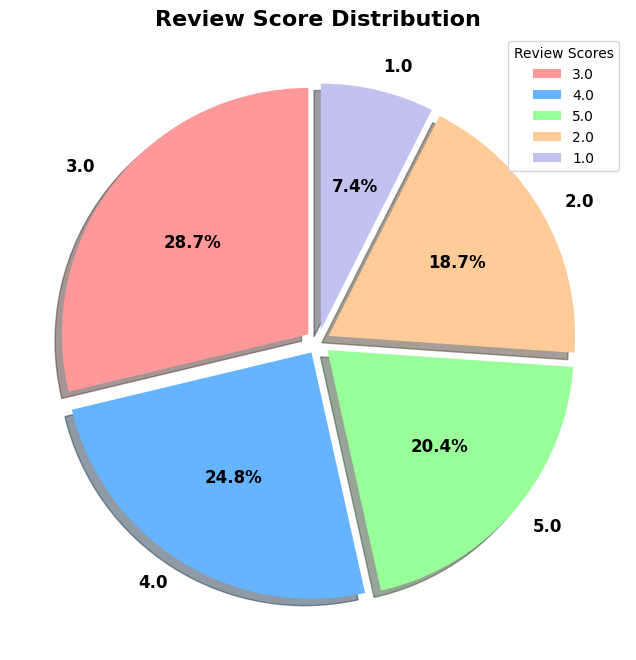

In [22]:
single_visit_df['order_id']
percentage_distribution = single_visit_df['review_score'].value_counts(normalize=True) * 100
# Define custom colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create the pie chart with customizations
plt.figure(figsize=(8, 8))
plt.pie(percentage_distribution,
        labels=percentage_distribution.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=[0.05, 0.05, 0.05, 0.05, 0.05],  # Explode slices for emphasis
        shadow=True,  # Add shadow
        textprops={'fontsize': 12, 'weight': 'bold'})  # Customize text properties

plt.title('Review Score Distribution', fontsize=16, fontweight='bold')  # Customize title

# Add a legend
plt.legend(percentage_distribution.index, title="Review Scores", loc="best")

plt.show()

- To Analyze the reviews we need to drop the nan columns

In [23]:
review_comment_message_dropna = single_visit_df['review_comment_message'].dropna()
review_comment_message_dropna

0                    Excelente serviço de compras on line.
3        Produto como descrito. Mas não gostei pq o som...
4                        Produto lindo! De ótima qualidade
8        Demora absurda para entrega, dentro do prazo e...
11       Amei o conj! Foi entregue rápido! O conj é per...
                               ...                        
32979        A capa aderiu bem no meu Redmi 4x, recomendo!
32981                                 Tudo certo e rápido 
32985                                            Muito bom
32989                                            Muito bom
32994                                       Ótimo produto 
Name: review_comment_message, Length: 7009, dtype: object

- Now Our Data is cleaned we can start using ntlk lib

In [24]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
# from googletrans import Translator
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [25]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_span = set(stopwords.words('portuguese'))


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
import nltk
print(nltk.data.path)

['/root/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


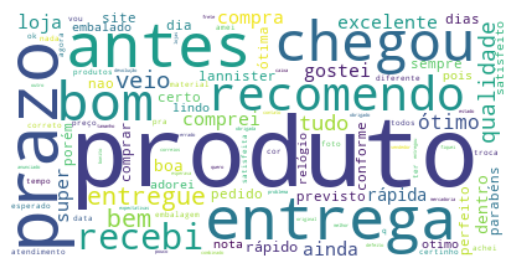

In [27]:
def tokenize_content(content):
  words = [word.lower() for word in nltk.word_tokenize(content) if word.isalpha()]
  words = [word for word in words if word not in stopwords_span]
  return words

reviews = review_comment_message_dropna.tolist()
top_tokens_list = []

# Create top_tokens_list for all words in reviews
for review in reviews:
  token_words = tokenize_content(review)
  top_tokens_list.append(token_words)

top_tokens = [item for sublist in top_tokens_list for item in sublist]
cnt = Counter()

# Count the occurances of words
for word in top_tokens:
  cnt[word] += 1

top_most_common = sorted(cnt.items(), key=lambda item: -item[1])[:100]
span_freq_dict = {}

# Creat top most common words dict with frequencies
for i in top_most_common:
  # Ignore the word if it is in stopwords in english
  span_freq_dict[i[0]] = i[1]

wc = WordCloud(background_color='white')
wc.generate_from_frequencies(span_freq_dict)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- produto: product
- entrega: delivery
- antes: before
- prazo: deadline/time frame
- chegou: arrived
- recomendo: recommend
- bom: good
- recebi: received
- qualidade: quality
- ótimo: excellent
- excelente: excellent
- comprei: bought
- gostei: liked
- bem: well
- veio: came

In [28]:
positive_words = [
    "bom", "ótimo", "excelente", "maravilhoso", "incrível", "perfeito", "feliz", "satisfatório",
    "agradável", "eficiente", "rápido", "bonito", "adorável", "amável", "simpático", "competente",
    "valioso", "extraordinário", "brilhante", "funcional", "prático", "confiável", "espetacular",
    "fácil", "saudável", "honesto", "útil", "fenomenal", "confortável", "inspirador", "fantástico",
    "forte", "leve", "barato", "bem-feito", "original", "seguro", "recomendado", "organizado",
    "inteligente", "eficaz", "fresco", "animado", "agradável", "grande", "gentil", "surpreendente",
    "aprovado", "interessante", "saboroso", "especial", "divertido", "positivo", "limpo", "amigável",
    "brilhante", "sustentável", "atencioso", "encantador", "gracioso", "luxuoso", "acolhedor",
    "admirável", "cativante", "valente", "abundante", "generoso", "precioso", "vigoroso", "cheerful",
    "espontâneo", "vibrante", "esperançoso", "próspero", "magnífico", "confiante", "assertivo",
    "focado", "radiante", "positivo", "heroico", "forte", "luminoso", "harmonioso", "leve",
    "sensacional", "memorável", "claro", "assertivo", "rápido", "alegre", "seguro", "admirável",
    "decidido", "justo", "acolhedor", "visionário", "resiliente", "benéfico", "verdadeiro"
]
negative_words = [
    "ruim", "péssimo", "horrível", "insatisfatório", "lento", "inútil", "ineficiente",
    "desagradável", "caro", "problemático", "fraco", "demorado", "complicado", "mau",
    "desonesto", "quebrado", "difícil", "frustrante", "decepcionante", "desorganizado",
    "irritante", "triste", "desastroso", "ineficaz", "tóxico", "chato", "insuportável",
    "vazio", "impraticável", "incorreto", "engano", "enganador", "desleal", "incômodo",
    "desequilibrado", "inadequado", "horripilante", "amargo", "miserável", "desmotivado",
    "tenso", "confuso", "vulnerável", "desastroso", "prejudicial", "turbulento", "enganoso",
    "negligente", "arrogante", "cansativo", "temível", "desconfiado", "abominável", "mentiroso",
    "frustrante", "punitivo", "covarde", "injusto", "imoral", "ilógico", "fracassado",
    "odioso", "vil", "detestável", "impiedoso", "desumano", "nocivo", "abusivo", "irracional",
    "problemático", "lamentável", "enganador", "vazio", "arisco", "descontrolado",
    "deplorável", "desesperado", "desprezível", "sombrio", "decadente", "intolerável",
    "desagradável", "áspero", "chocante", "cruel", "grotesco", "enfadonho", "opressivo",
    "obsoleto", "ridículo", "desesperador", "tedioso", "rancoroso", "horrível", "apático",
    "desanimado", "agressivo"
]


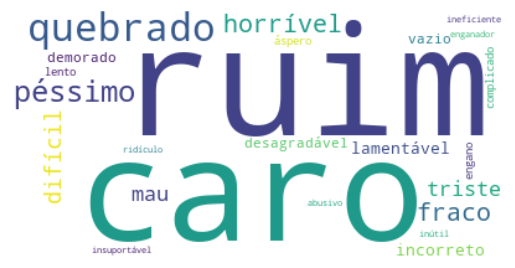

In [29]:
def tokenize_content(content):
  words = [word.lower() for word in nltk.word_tokenize(content) if word.isalpha()]
  words = [word for word in words if word  in negative_words]
  return words

reviews = review_comment_message_dropna.tolist()
top_tokens_list = []

# Create top_tokens_list for all words in reviews
for review in reviews:
  token_words = tokenize_content(review)
  top_tokens_list.append(token_words)

top_tokens = [item for sublist in top_tokens_list for item in sublist]
cnt = Counter()

# Count the occurances of words
for word in top_tokens:
  cnt[word] += 1

top_most_common = sorted(cnt.items(), key=lambda item: -item[1])[:100]
span_freq_dict = {}

# Creat top most common words dict with frequencies
for i in top_most_common:
  # Ignore the word if it is in stopwords in english
  span_freq_dict[i[0]] = i[1]

wc = WordCloud(background_color='white')
wc.generate_from_frequencies(span_freq_dict)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- caro – expensive
- ruim – bad
- quebrado – broken
- péssimo – awful
- fraco – weak
- lento – slow
- difícil – difficult
- triste – sad
- lamentável – regrettable
- incorreto – incorrect
- complicado – complicated
- enganador – deceptive
- vazio – empty
- desagradável – unpleasant
- ridículo – ridiculous
- demorado – delayed
- inútil – useless
- abusivo – abusive
- mau – bad
- insuportável – unbearable
- áspero – rough

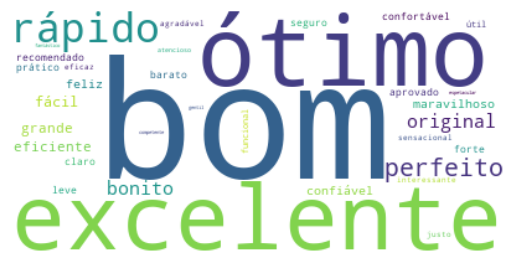

In [30]:
def tokenize_content(content):
  words = [word.lower() for word in nltk.word_tokenize(content) if word.isalpha()]
  words = [word for word in words if word  in positive_words]
  return words

reviews = review_comment_message_dropna.tolist()
top_tokens_list = []

# Create top_tokens_list for all words in reviews
for review in reviews:
  token_words = tokenize_content(review)
  top_tokens_list.append(token_words)

top_tokens = [item for sublist in top_tokens_list for item in sublist]
cnt = Counter()

# Count the occurances of words
for word in top_tokens:
  cnt[word] += 1

top_most_common = sorted(cnt.items(), key=lambda item: -item[1])[:100]
span_freq_dict = {}

# Creat top most common words dict with frequencies
for i in top_most_common:
  # Ignore the word if it is in stopwords in english
  span_freq_dict[i[0]] = i[1]

wc = WordCloud(background_color='white')
wc.generate_from_frequencies(span_freq_dict)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- bom – good
- ótimo – great
- excelente – excellent
- rápido – fast
- perfeito – perfect
- feliz – happy
- maravilhoso – wonderful
- bonito – beautiful
- confiável – reliable
- fácil – easy
- funcional – functional
- barato – cheap
- eficiente – efficient
- prático – practical
- original – original
- grande – big
- confortável – comfortable
- aprovado – approved
- sensacional – sensational
- interessante – interesting
- seguro – safe
- forte – strong
- leve – light
- útil – useful
- claro – clear
- recomendado – recommended